In [7]:
import pandas as pd
from neuralprophet import NeuralProphet
import joblib

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [4]:
#core_weather = pd.read_csv("local_weather.csv",parse_dates=["DATE"], index_col=["DATE"])

In [8]:
core_weather = pd.read_csv("local_weather.csv")

In [9]:
core_weather["DATE"]=pd.to_datetime(core_weather["DATE"])

In [84]:
core_weather.index

RangeIndex(start=0, stop=17456, step=1)

In [85]:
core_weather.columns

Index(['STATION', 'NAME', 'DATE', 'ACMH', 'ACSH', 'AWND', 'DAPR', 'FMTM',
       'FRGT', 'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN',
       'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WSF1', 'WSF2', 'WSF5', 'WSFG',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT09', 'WT16',
       'WT18'],
      dtype='object')

In [10]:
core_weather = core_weather[["DATE","PRCP","TMAX","TMIN"]].copy()

In [11]:
core_weather.columns = ["ds","precip","y","temp_min"]

In [94]:
core_weather

,ds,precip,y,temp_min
0,1960-01-01,0.0,49.0,30.0
1,1960-01-02,0.0,49.0,29.0
2,1960-01-03,0.0,54.0,35.0
3,1960-01-04,0.0,54.0,36.0
4,1960-01-05,0.0,55.0,33.0
...,...,...,...,...
17451,2023-09-12,0.0,71.0,56.0
17452,2023-09-13,0.0,73.0,56.0
17453,2023-09-14,0.0,72.0,58.0
17454,2023-09-15,0.0,71.0,63.0


In [12]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [13]:
core_weather = core_weather.ffill()

In [14]:
target = core_weather

In [15]:
target = target[["ds","y","precip","temp_min"]]

In [16]:
target

,ds,y,precip,temp_min
0,1960-01-01,49.0,0.0,30.0
1,1960-01-02,49.0,0.0,29.0
2,1960-01-03,54.0,0.0,35.0
3,1960-01-04,54.0,0.0,36.0
4,1960-01-05,55.0,0.0,33.0
...,...,...,...,...
17451,2023-09-12,71.0,0.0,56.0
17452,2023-09-13,73.0,0.0,56.0
17453,2023-09-14,72.0,0.0,58.0
17454,2023-09-15,71.0,0.0,63.0


In [17]:
target.apply(pd.isnull).sum()/target.shape[0]

ds          0.0
y           0.0
precip      0.0
temp_min    0.0
dtype: float64

In [48]:
m=NeuralProphet()
m.set_plotting_backend("matplotlib")
train, val = m.split_df(target, valid_p=0.2)
print("Dataset size:", len(target))
print("Train dataset size:", len(train))
print("Validation dataset size:", len(val))

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Dataset size: 17456
Train dataset size: 13965
Validation dataset size: 3491


In [49]:
m.add_lagged_regressor('precip')
m.add_lagged_regressor('temp_min')
m.fit(train,freq='D',epochs= 1098,validation_df=val)

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate 

Epoch 1098: 100%|██████████| 1098/1098 [00:00<00:00, 1181.31it/s, loss=0.00657, v_num=5, MAE_val=4.320, RMSE_val=5.810, Loss_val=0.00959, RegLoss_val=0.000, MAE=4.210, RMSE=5.630, Loss=0.00678, RegLoss=0.000]  


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,72.213486,80.521301,1.248600,0.0,0,43.304050,53.473103,0.510229,0.0
1,64.193184,71.857040,1.063299,0.0,1,38.310986,47.528576,0.424573,0.0
2,56.567314,63.575436,0.888984,0.0,2,33.902061,42.160992,0.349847,0.0
3,49.459839,55.787796,0.728927,0.0,3,30.081804,37.405598,0.284652,0.0
4,42.997265,48.623024,0.586490,0.0,4,26.810535,33.181774,0.228787,0.0
...,...,...,...,...,...,...,...,...,...
1093,4.315054,5.807695,0.009590,0.0,1093,4.208395,5.625563,0.006761,0.0
1094,4.315150,5.807683,0.009590,0.0,1094,4.205075,5.628284,0.006755,0.0
1095,4.315051,5.807689,0.009590,0.0,1095,4.205279,5.625448,0.006753,0.0
1096,4.315061,5.807673,0.009590,0.0,1096,4.204975,5.620469,0.006760,0.0


In [104]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,170.197144,178.905518,3.552313,0.0,0,104.432922,123.454094,1.642047,0.0
1,148.496140,156.743408,3.035622,0.0,1,89.791855,107.991646,1.378711,0.0
2,126.954048,134.493744,2.522715,0.0,2,75.431870,92.369728,1.120293,0.0
3,105.672867,112.317444,2.016029,0.0,3,61.511417,76.826866,0.871297,0.0
4,84.851601,90.288513,1.520457,0.0,4,48.346249,61.395313,0.635304,0.0
...,...,...,...,...,...,...,...,...,...
1094,4.316716,5.807186,0.009588,0.0,1094,4.205144,5.619084,0.006754,0.0
1095,4.316421,5.807215,0.009589,0.0,1095,4.200747,5.619390,0.006749,0.0
1096,4.316484,5.807201,0.009588,0.0,1096,4.202583,5.615396,0.006753,0.0
1097,4.316357,5.807247,0.009589,0.0,1097,4.200424,5.614564,0.006746,0.0


In [29]:
len(target)
target

,ds,y,precip,temp_min
0,1960-01-01,49.0,0.0,30.0
1,1960-01-02,49.0,0.0,29.0
2,1960-01-03,54.0,0.0,35.0
3,1960-01-04,54.0,0.0,36.0
4,1960-01-05,55.0,0.0,33.0
...,...,...,...,...
17451,2023-09-12,71.0,0.0,56.0
17452,2023-09-13,73.0,0.0,56.0
17453,2023-09-14,72.0,0.0,58.0
17454,2023-09-15,71.0,0.0,63.0


In [50]:
df_future1 = m.make_future_dataframe(val, n_historic_predictions=True, periods=365)
#df_future1 = df_future1.iloc[:-1,:]
df_future1,val
forecast = m.predict(df_future1)
# m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 67.24it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


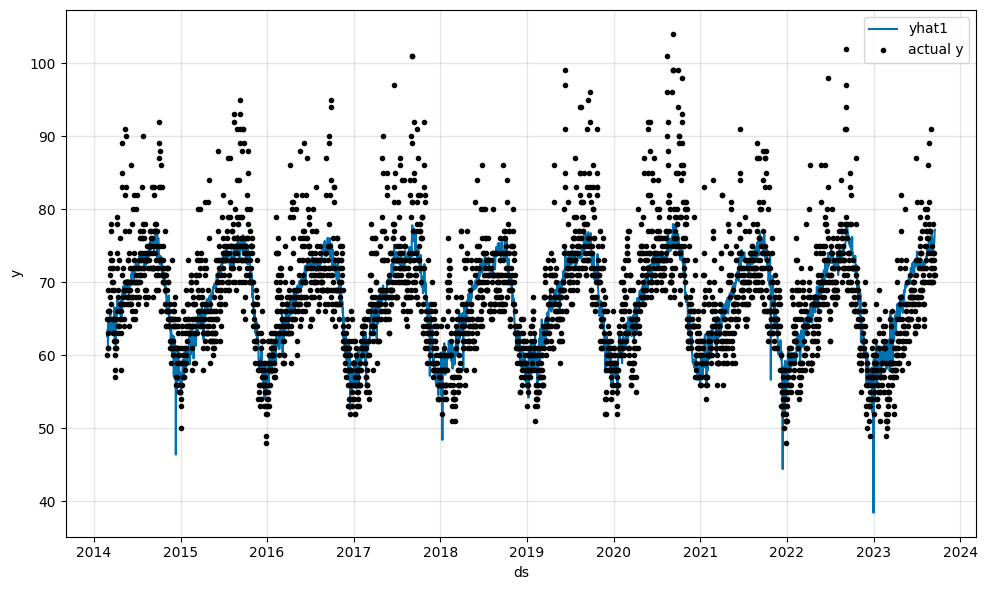

In [51]:
m.plot(forecast)

In [53]:
df_future2 = m.make_future_dataframe(val,periods = 30)
forecast2 = m.predict(df_future2)
m.plot(forecast2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.df_utils.check_single_dataframe) - Encountered lagged regressor with only unique values in training set. Variable will be removed for global modeling if this is true for all time series.
WARNING - (NP.df_utils.check_single_dataframe) - Encountered lagged regressor with only unique values in training set. Variable will be removed for global modeling if this is true for all time series.
WARNING - (NP.df_utils.check_dataframe) - Encountered lagged regressor with only unique values in training set across all IDs.Automatically removed variable.
WARNING - (NP.df_utils.check_dataframe) - Encountered lagged regressor with only unique values in training set across all IDs.Automatically removed variable.
WARNING - (NP.data.processing._check_dataframe) - Removing lagged regressor precip because it is n

WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 280.33it/s]


ValueError: Length of values (3) does not match length of index (2)